<a href="https://colab.research.google.com/github/profandersonvanin01/analisa_ai/blob/main/AnalisaAi_SUICIDIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
bd = pd.read_csv('https://github.com/ProfAndersonVanin/analisa_ai/raw/refs/heads/main/datasus_suicidio.csv', encoding='latin1')
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [66]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


Colunas que precisam de **atenção**



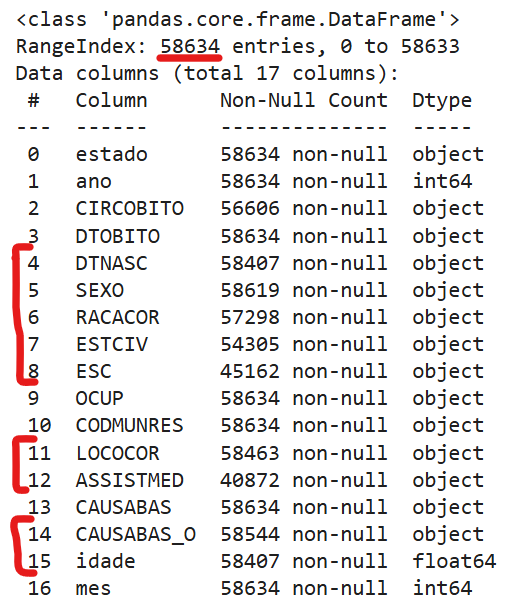

In [67]:
bd.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

**TOTAL DE REGISTROS ==> 58634**

- QUANTIDADE DE DADOS NULOS

- CIRCOBTIDO ==> 56606 (3,46%) = 2028
- DTNASC ==> 58407 (0,38%) = 227
- SEXO ==> 58619 (0,026%) = 15
- RACACOR ==> 57298 (2,28%) = 1336
- ESTCIV ==> 54305 (**7,38%**) = 4329
- ESC ==> 45162 (**22,98%**) = 13472
- LOCOCOR ==> 58463 (0,29%) = 171
- ASSISTMED ==> 40872 (**30,29%**) = 17762
- CAUSABAS_O ==> 58544 (0,15%) = 90
- idade ==> 58407 (0,39%) = 227

Colunas que requerem maior atenção são: **ESTCIV**, **ESC** e **ASSISTMED**

As demais colunas como possuem uma porcentagem menor que 5% do total de dados, nestas os registros serão excluídos.

> **Obs.: Isso não é uma regra, foi uma opção minha com base na quantidade de valores nulos!**

In [68]:
# Remover registros com valores nulos apenas nas colunas 'Nome' e 'Idade'
bd2 = bd.dropna(subset=['CIRCOBITO', 'DTNASC', 'SEXO', 'RACACOR', 'LOCOCOR','CAUSABAS_O','idade'])
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [69]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      51448 non-null  object 
 8   ESC         42726 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   38937 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [70]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV         3522
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESTCIV**

Temos a seguinte informação a respeito desta coluna:

- **ESTCIV**: 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [71]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', nan, 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [72]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESTCIV'] = bd2['ESTCIV'].fillna('Não Informado')

In [73]:
bd2['ESTCIV'].unique()

array(['Casado', 'União consensual', 'Não Informado', 'Solteiro', 'Viúvo',
       'Separado judicialmente'], dtype=object)

In [74]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC           12244
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ESC**

Temos a seguinte informação a respeito desta coluna:

- **ESC**: 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos, 0;6;7;9;A : NA .

Vamos analisar a ocorrência individual de valores nesta coluna:

In [75]:
bd2['ESC'].unique()

array(['4 a 7 anos', '12 e mais', nan, '8 a 11 anos', '1 a 3 anos',
       'Nenhuma'], dtype=object)

In [76]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ESC'] = bd2['ESC'].fillna('Não Informado')

In [77]:
bd2.isnull().sum()

estado            0
ano               0
CIRCOBITO         0
DTOBITO           0
DTNASC            0
SEXO              0
RACACOR           0
ESTCIV            0
ESC               0
OCUP              0
CODMUNRES         0
LOCOCOR           0
ASSISTMED     16033
CAUSABAS          0
CAUSABAS_O        0
idade             0
mes               0
dtype: int64

# **Analisando a coluna ASSISTMED**

Temos a seguinte informação a respeito desta coluna:

Assistência médica

- **ASSISTMED**: 1: Sim, 2: Não, 9: NA.

Vamos analisar a ocorrência individual de valores nesta coluna:

In [78]:
bd2['ASSISTMED'].unique()

array(['Não', nan, 'Sim'], dtype=object)

In [79]:
# Substituir NaN por 'Não Informado'
bd2.loc[:, 'ASSISTMED'] = bd2['ASSISTMED'].fillna('Não Informado')

In [80]:
bd2.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

**NESTE PONTO NÃO TEMOS MAIS DADOS NULOS OU FALTANTES.**

A base inicial possuia `58634` registros e agora estamos com `54970`.

Na etapa de remoção de dados nulos removemos `6,25%` do total de registros.

In [81]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      54970 non-null  object 
 1   ano         54970 non-null  int64  
 2   CIRCOBITO   54970 non-null  object 
 3   DTOBITO     54970 non-null  object 
 4   DTNASC      54970 non-null  object 
 5   SEXO        54970 non-null  object 
 6   RACACOR     54970 non-null  object 
 7   ESTCIV      54970 non-null  object 
 8   ESC         54970 non-null  object 
 9   OCUP        54970 non-null  object 
 10  CODMUNRES   54970 non-null  object 
 11  LOCOCOR     54970 non-null  object 
 12  ASSISTMED   54970 non-null  object 
 13  CAUSABAS    54970 non-null  object 
 14  CAUSABAS_O  54970 non-null  object 
 15  idade       54970 non-null  float64
 16  mes         54970 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.5+ MB


In [82]:
bd2

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


Veja que temos as colunas: `DTOBITO`, `DTNASC` e `idade`. Há outra coluna chamado `ano`.

Vamos manter a coluna `ano` e `idade`. As outras duas não são necessárias.

Outro tipo de tratamento que pode ser feito é converter o valor da coluna `idade` para inteiro.

In [83]:
# Remover colunas 'Cidade' e 'Estado'
bd3 = bd2.drop(columns=['DTOBITO', 'DTNASC'])

In [84]:
bd3

,estado,ano,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [85]:
# Converter valores da coluna 'Idade' para inteiro
bd3['idade'] = bd3['idade'].astype(int)

In [86]:
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estado      54970 non-null  object
 1   ano         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  idade       54970 non-null  int32 
 14  mes         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


Renomeando as colunas para ficarem no mesmo formato

In [87]:
# Renomear colunas
bd3 = bd3.rename(columns={'estado': 'ESTADO', 'ano': 'ANO','idade':'IDADE','mes':'MES'})
bd3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54970 entries, 0 to 58633
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESTADO      54970 non-null  object
 1   ANO         54970 non-null  int64 
 2   CIRCOBITO   54970 non-null  object
 3   SEXO        54970 non-null  object
 4   RACACOR     54970 non-null  object
 5   ESTCIV      54970 non-null  object
 6   ESC         54970 non-null  object
 7   OCUP        54970 non-null  object
 8   CODMUNRES   54970 non-null  object
 9   LOCOCOR     54970 non-null  object
 10  ASSISTMED   54970 non-null  object
 11  CAUSABAS    54970 non-null  object
 12  CAUSABAS_O  54970 non-null  object
 13  IDADE       54970 non-null  int32 
 14  MES         54970 non-null  int64 
dtypes: int32(1), int64(2), object(12)
memory usage: 6.5+ MB


In [88]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,0,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7


Vejam que na coluna OCUP aparecem alguns valores estranhos:

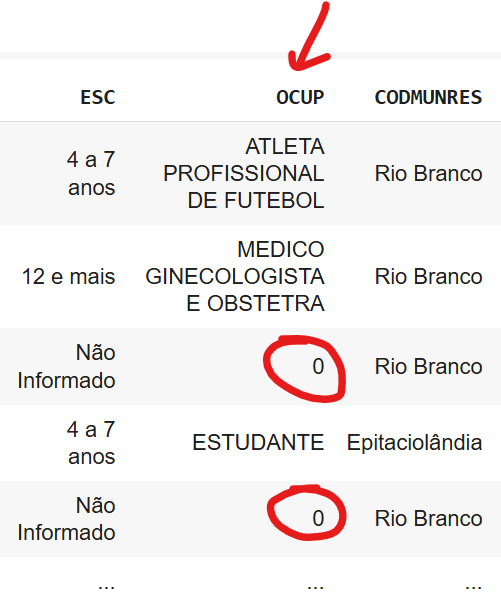

0 == sem profissao

- Tratar esses valores....

- Verificar valores unicos em todas as colunas e ver se encontram mais alguma assim...

...

In [89]:
bd3['OCUP'].unique()

array(['ATLETA PROFISSIONAL DE FUTEBOL',
       'MEDICO GINECOLOGISTA E OBSTETRA', '0', ..., 'CATADOR DE MARISCOS',
       'SUBTENENTE BOMBEIRO MILITAR',
       'GERENTE DE PESQUISA E DESENVOLVIMENTO (P&D)'], dtype=object)

In [90]:
data = bd3["OCUP"].unique()

In [91]:
bd3[((bd3['OCUP'] == '0') | (bd3['OCUP'] == 'ESTUDANTE')) & (bd3['IDADE'] < 15)]

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
160,AL,2014,Suicídio,Masculino,Parda,Solteiro,Não Informado,ESTUDANTE,Traipu,Domicílio,Não Informado,X700,X700,14,12
186,AP,2014,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,0,Macapá,Domicílio,Não,X709,X709,14,6
278,AM,2014,Acidente,Masculino,Parda,Solteiro,4 a 7 anos,0,Guajará,Via pública,Não,X720,X720,9,4
280,AM,2014,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Fonte Boa,Domicílio,Sim,X700,X700,13,4
324,AM,2014,Suicídio,Feminino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Barreirinha,Outros,Sim,X700,X700,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58225,SP,2018,Suicídio,Feminino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Americana,Domicílio,Não,X700,X700,12,10
58273,SP,2018,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Cosmópolis,Domicílio,Não Informado,X700,X700,12,11
58497,SE,2018,Suicídio,Feminino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Nossa Senhora Das Dores,Domicílio,Não,X740,X740,13,11
58534,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Nova Olinda,Domicílio,Não,X700,X700,13,2


In [92]:
bd3[(bd3['IDADE'] < 15)]

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
160,AL,2014,Suicídio,Masculino,Parda,Solteiro,Não Informado,ESTUDANTE,Traipu,Domicílio,Não Informado,X700,X700,14,12
186,AP,2014,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,0,Macapá,Domicílio,Não,X709,X709,14,6
278,AM,2014,Acidente,Masculino,Parda,Solteiro,4 a 7 anos,0,Guajará,Via pública,Não,X720,X720,9,4
280,AM,2014,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Fonte Boa,Domicílio,Sim,X700,X700,13,4
324,AM,2014,Suicídio,Feminino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Barreirinha,Outros,Sim,X700,X700,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58225,SP,2018,Suicídio,Feminino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Americana,Domicílio,Não,X700,X700,12,10
58273,SP,2018,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Cosmópolis,Domicílio,Não Informado,X700,X700,12,11
58497,SE,2018,Suicídio,Feminino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Nossa Senhora Das Dores,Domicílio,Não,X740,X740,13,11
58534,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,ESTUDANTE,Nova Olinda,Domicílio,Não,X700,X700,13,2


In [94]:
# Substituir os valores '0' da coluna 'OCUP' por 'DESEMPREGADO'
bd3.loc[bd3['OCUP'] == '0', 'OCUP'] = 'DESEMPREGADO'

In [95]:
bd3[bd3['OCUP'] == 'DESEMPREGADO']

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
5,AC,2014,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,51,2
6,AC,2014,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Senador Guiomard,Outros,Não,X700,X700,25,2
8,AC,2014,Suicídio,Masculino,Branca,Casado,12 e mais,DESEMPREGADO,Cruzeiro do Sul,Domicílio,Não,X702,X702,39,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58606,TO,2018,Suicídio,Masculino,Parda,Separado judicialmente,4 a 7 anos,DESEMPREGADO,Tocantinópolis,Domicílio,Não,X700,X700,31,9
58612,TO,2018,Suicídio,Masculino,Parda,Solteiro,1 a 3 anos,DESEMPREGADO,Araguatins,Domicílio,Não Informado,X700,X700,54,11
58615,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Wanderlândia,Outros,Não Informado,X701,X701,26,12
58617,TO,2018,Suicídio,Masculino,Parda,Solteiro,4 a 7 anos,DESEMPREGADO,Nova Olinda,Via pública,Não,X824,X824,29,12


In [108]:
bd3['LOCOCOR'].unique()

array(['Domicílio', 'Outros', 'Hospital', 'Via pública',
       'Outro estabelecimento de saúde', '6'], dtype=object)

In [ ]:
# Substituir os valores '6' da coluna 'LOCOCOR' por 'Outros'
bd3.loc[bd3['LOCOCOR'] == '6', 'LOCOCOR'] = 'Outros'

In [116]:
bd3

,ESTADO,ANO,CIRCOBITO,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,IDADE,MES
0,AC,2014,Suicídio,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37,1
1,AC,2014,Suicídio,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48,1
2,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Domicílio,Não,X700,X700,71,1
3,AC,2014,Suicídio,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15,2
4,AC,2014,Suicídio,Masculino,Branca,Não Informado,Não Informado,DESEMPREGADO,Rio Branco,Outros,Não,X700,X700,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29,4
58630,TO,2018,Suicídio,Feminino,Parda,União consensual,Não Informado,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28,5
58631,TO,2018,Suicídio,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63,5
58632,TO,2018,Suicídio,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17,7
